In [1]:
import numpy as np
import transformers
import pandas as pd
from transformers import BertTokenizer, BertForSequenceClassification
import shap

In [4]:
dataset = pd.read_csv('weibo.csv')

In [5]:
# 缩短字符串以适应管道模型
short_data = [v[:500] for v in dataset["review"][:20]]

In [2]:
tokenizer = BertTokenizer.from_pretrained("google-bert/bert-base-chinese")
model = BertForSequenceClassification.from_pretrained("google-bert/bert-base-chinese", num_labels=2)

Some weights of the model checkpoint at google-bert/bert-base-chinese were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.seq_relationship.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were not initialized from the model c

In [3]:
#使用pipeline API来快速使用一些预训练模型——情感分析预训练模型：分析文本是正面的还是负面的
classifier = transformers.pipeline("sentiment-analysis", model=model,tokenizer=tokenizer, return_all_scores=True)

In [6]:
classifier(short_data[:2])

[[{'label': 'LABEL_0', 'score': 0.3240658640861511},
  {'label': 'LABEL_1', 'score': 0.6759341955184937}],
 [{'label': 'LABEL_0', 'score': 0.24894306063652039},
  {'label': 'LABEL_1', 'score': 0.751056969165802}]]

In [7]:
# 将模型输入shap解释器中，创建一个explainer对象，利用它计算每个观察对象的SHAP值，每个特征将对应一个SHAP值
explainer = shap.Explainer(classifier)

In [8]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:2])

In [19]:
shap.plots.text(shap_values[:, :, "LABEL_0"])

In [13]:
# explain the predictions of the pipeline on the first two samples
shap_values = explainer(short_data[:20])

Partition explainer: 21it [00:45,  3.06s/it]                        


Glyph 32570 missing from current font.
Glyph 29983 missing from current font.
Glyph 24555 missing from current font.
Glyph 20667 missing from current font.
Glyph 36234 missing from current font.
Glyph 29233 missing from current font.
Glyph 20320 missing from current font.
Glyph 65281 missing from current font.
Glyph 32570 missing from current font.
Glyph 29983 missing from current font.
Glyph 24555 missing from current font.
Glyph 20667 missing from current font.
Glyph 36234 missing from current font.
Glyph 29233 missing from current font.
Glyph 20320 missing from current font.
Glyph 65281 missing from current font.


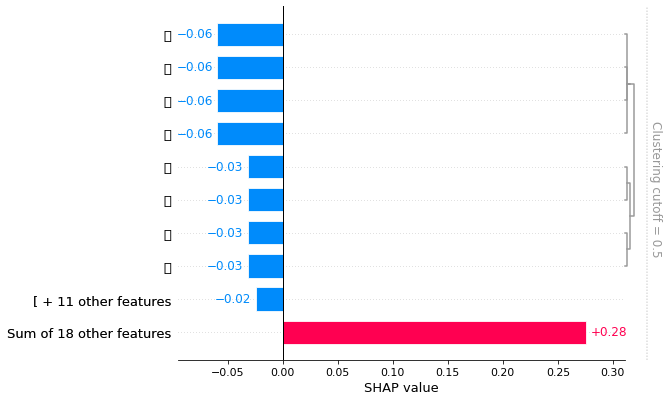

In [16]:
shap.plots.bar(shap_values[0, :, "LABEL_0"])

Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
Glyph 23244 missing from current font.
Glyph 30097 missing from current font.
Glyph 24422 missing from current font.
Glyph 20146 missing from current font.
Glyph 23244 missing from current font.
Glyph 30097 missing from current font.
Glyph 24422 missing from current font.
Glyph 20146 missing from current font.


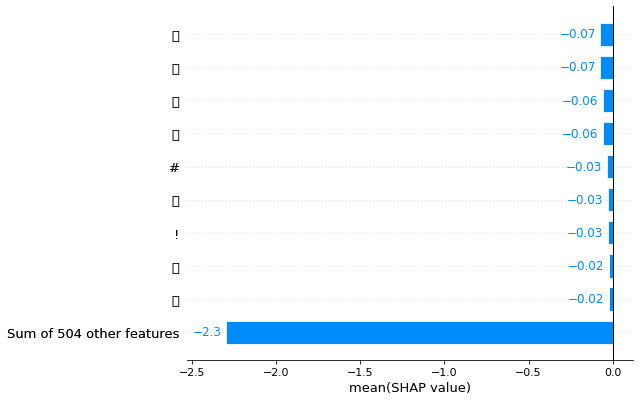

In [17]:
shap.plots.bar(shap_values[:, :, "LABEL_0"].mean(0))

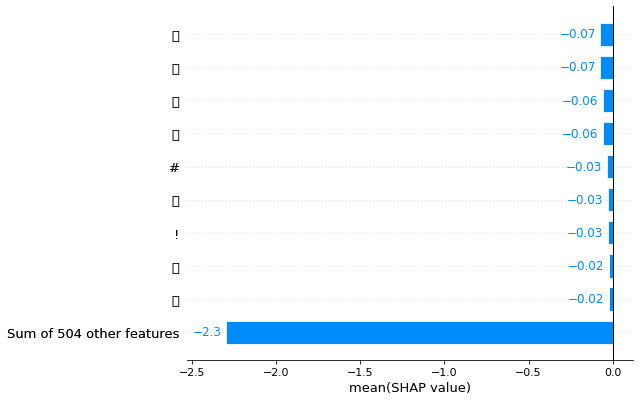

In [18]:
shap.plots.bar(shap_values[:, :, "LABEL_0"].mean(0), order=shap.Explanation.argsort)